In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.set_option('display.max_column', None)

pl=pd.read_csv('people.csv.zip')
ac=pd.read_csv('act_train.csv.zip')
pl['date']=pd.to_datetime(pl['date'])
ac['date']=pd.to_datetime(ac['date'])
pl_columns=[]
for col in pl.columns:
    if 'char' in col or 'date' in col:
        pl_columns.append('pl_' + col)
    else:
        pl_columns.append(col)
pl.columns=pl_columns
ac_columns=[]
for col in ac.columns:
    if 'char' in col or 'date' in col:
        ac_columns.append('act_' + col)
    else:
        ac_columns.append(col)
ac.columns=ac_columns
ac_pl_merge = pd.merge(ac, pl, on='people_id')
ac_pl_merge.to_csv('activity_people_merged_dataset.csv')

ac_pl_merge.head()

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10,outcome,pl_char_1,group_1,pl_char_2,pl_date,pl_char_3,pl_char_4,pl_char_5,pl_char_6,pl_char_7,pl_char_8,pl_char_9,pl_char_10,pl_char_11,pl_char_12,pl_char_13,pl_char_14,pl_char_15,pl_char_16,pl_char_17,pl_char_18,pl_char_19,pl_char_20,pl_char_21,pl_char_22,pl_char_23,pl_char_24,pl_char_25,pl_char_26,pl_char_27,pl_char_28,pl_char_29,pl_char_30,pl_char_31,pl_char_32,pl_char_33,pl_char_34,pl_char_35,pl_char_36,pl_char_37,pl_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36


In [22]:
ac_pl_merge.shape

(2197291, 55)

In [23]:
# ac_pl_merge.act_char_10.notnull().sum()
# ac_pl_merge.groupby('outcome')['act_char_10'].count()
ac_pl_merge.outcome.value_counts()

0    1221794
1     975497
Name: outcome, dtype: int64

In [24]:
# ac_pl_merge.act_char_10.value_counts()

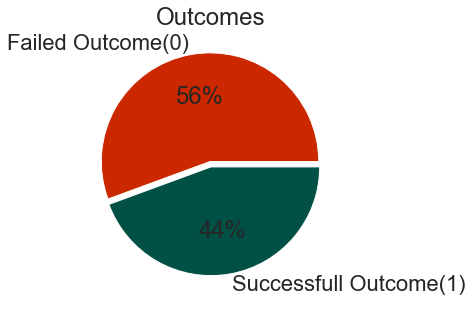

<Figure size 720x360 with 0 Axes>

In [120]:
sns.set(font_scale=2)
plt.figure(figsize=(10,5))
plt.pie(ac_pl_merge['outcome'].value_counts(),colors=[ '#cb2800', '#015045'], labels=['Failed Outcome(0)','Successfull Outcome(1)'],autopct='%1.0f%%', explode=[0.05,0], rotatelabels=False)
plt.title('Outcomes')
plt.figure(figsize=(10,5))

plt.savefig('figures/Successfull_Failed Outcomes')

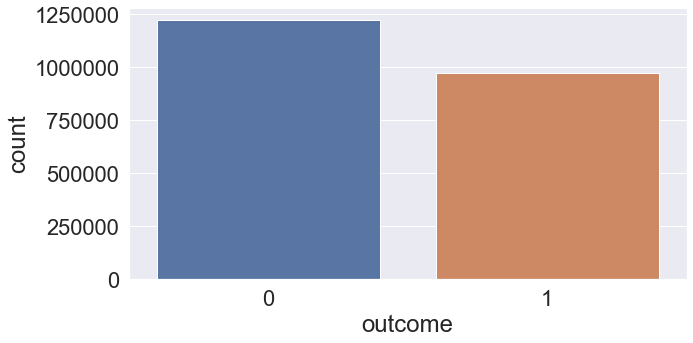

In [26]:
plt.figure(figsize=(10,5))
sns.countplot('outcome', data=ac_pl_merge)

## Insight:

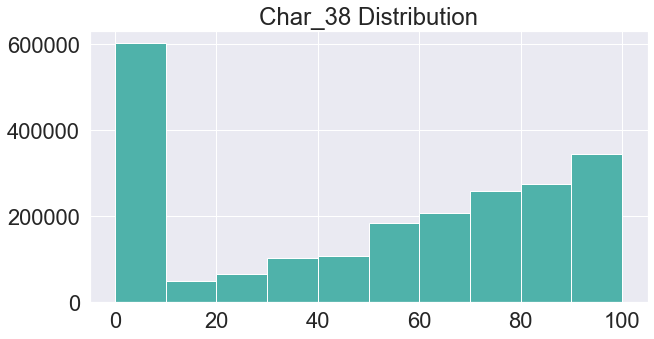

In [123]:
plt.figure(figsize=(40,7))
ac_pl_merge.pl_char_38.plot(kind='hist',figsize=(10,5), color= '#4fb2aa')
# plt.xlabel('')
plt.ylabel('')
plt.title('Char_38 Distribution')
plt.savefig('figures/Char_38 Distribution')


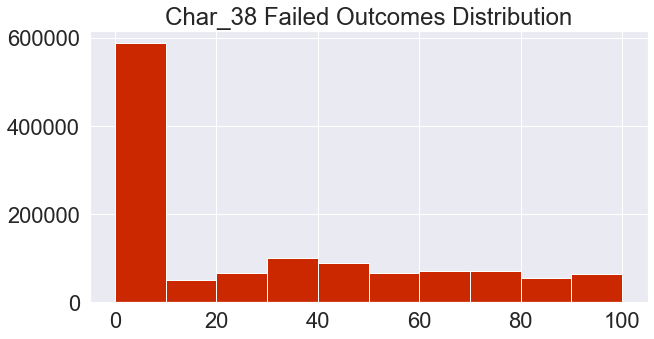

In [29]:
pl.columns
# pl_char_38=pl[['people_id', 'char_38']]
# ac_outcome=ac[['people_id', 'outcome']]
# ac_pl_38_outcome_df=pl_char_38.merge(ac_outcome, how='left', on='people_id')
ac_pl_merge_38_outcome_0 = ac_pl_merge[ac_pl_merge['outcome'] == 0]
plt.figure(figsize=(10,5))
plt.hist(ac_pl_merge_38_outcome_0['pl_char_38'], color= '#cb2800')
# plt.xlabel('Char_38')
plt.title('Char_38 Failed Outcomes Distribution')
plt.savefig('figures/Char_38 Failed Outcomes Distribution')
# ac_pl_38_outcome_df_0.describe()

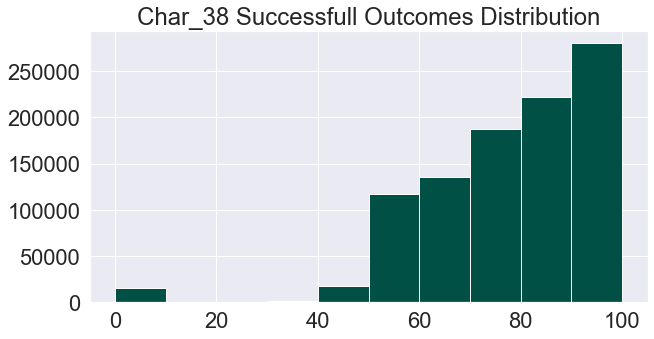

In [124]:
ac_pl_merge_38_outcome_1 = ac_pl_merge[ac_pl_merge['outcome'] == 1]
plt.figure(figsize=(10,5))
plt.hist(ac_pl_merge_38_outcome_1['pl_char_38'],color= '#015045')
plt.title('Char_38 Successfull Outcomes Distribution')
# plt.xlabel('Char_38')
plt.savefig('figures/Char_38 Successfull Outcomes Distribution')
# ac_pl_38_outcome_df_1.describe()

Text(0.5, 1.0, 'Activities Count by Year')

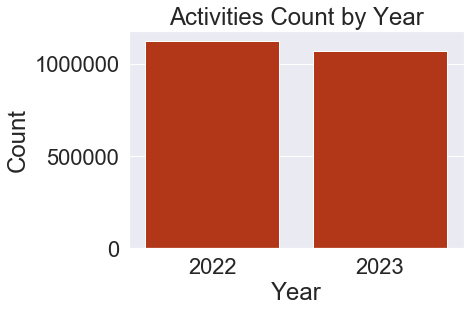

In [31]:
# ac.groupby(['outcome'])['char_1',
#        'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
# #        'char_9', 'char_10'].count().plot(kind='bar', stacked=True)
# ac.date.dt.year.value_counts().reset_index().plot(kind='bar')
ac_date_year=ac_pl_merge.act_date.dt.year.value_counts().reset_index()
sns.barplot('index', 'act_date',data=ac_date_year, color= '#cb2800')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Activities Count by Year')
# plt.savefig('figures/Activities Count by Year')

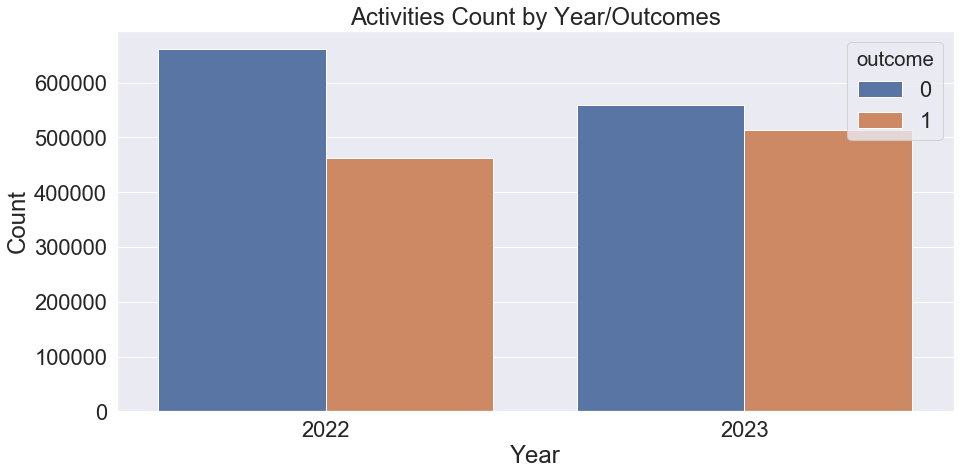

In [32]:
# ac_date_year=ac.date.dt.year.value_counts().reset_index()
plt.figure(figsize=(15,7))
sns.countplot(ac_pl_merge['act_date'].dt.year, data=ac_pl_merge, hue='outcome')
# sns.barplot('index', 'date',data=ac_date_year)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Activities Count by Year/Outcomes')
plt.savefig('figures/Activities Count by Year_OutcomeHue')

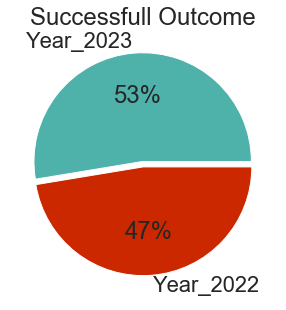

<Figure size 720x360 with 0 Axes>

In [33]:
# ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year.reset_index()['act_date'].value_counts().plot(kind='pie')
ac_pl_merge_0 = ac_pl_merge['outcome'] == 0
ac_pl_merge_1 = ac_pl_merge['outcome'] == 1
sns.set(font_scale=2)
plt.figure(figsize=(10,5))
plt.pie(ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year.reset_index()['act_date'].value_counts(),colors=[ '#4fb2aa', '#cb2800'], labels=['Year_2023','Year_2022'],autopct='%1.0f%%', explode=[0.05,0], rotatelabels=False)
plt.title('Successfull Outcome')
plt.figure(figsize=(10,5))
plt.savefig('figures/successful_outcome_by_years')

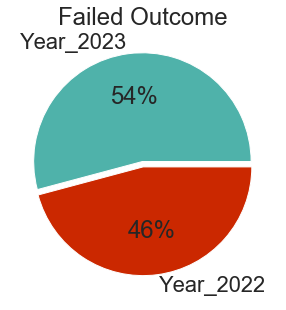

<Figure size 720x360 with 0 Axes>

In [34]:
# ac_pl_merge[ac_pl_merge_0]['act_date'].dt.year.reset_index()['act_date'].value_counts().plot(kind='pie')
sns.set(font_scale=2)
plt.figure(figsize=(10,5))
plt.pie(ac_pl_merge[ac_pl_merge_0]['act_date'].dt.year.reset_index()['act_date'].value_counts(),colors=[ '#4fb2aa', '#cb2800'], labels=['Year_2023','Year_2022'],autopct='%1.0f%%', explode=[0.05,0], rotatelabels=False)
plt.title('Failed Outcome')
plt.figure(figsize=(10,5))
plt.savefig('figures/Failed_outcome_by_years')

## Hypothesis Testing

H0: There is no difference in the mean of pl_char_38 with respect to  successfull outcomes(business value) between year 2022 and year 2023.
H1: There is difference in the mean of pl_char_38 with respect to  successful outcomes(business value) between year 2022 and year 2023.

In [35]:
ac_pl_merge_2022 = ac_pl_merge[ac_pl_merge['act_date'].dt.year == 2022]  
ac_pl_merge_2023 = ac_pl_merge[ac_pl_merge['act_date'].dt.year == 2023]  
stats.ttest_ind(ac_pl_merge_2022[ac_pl_merge_2022['outcome'] == 1]['pl_char_38'], ac_pl_merge_2023[ac_pl_merge_2023['outcome'] == 1]['pl_char_38'], equal_var=False)

Ttest_indResult(statistic=2.59177386864287, pvalue=0.009548393792587564)

Decision: There is enough evidance to reject the null hypothesis, that there is no difference in the mean of pl_char_38 with respect to  Successfull outcomes(business value) between year 2022 and year 2023

H0: There is no difference in the mean of pl_char_38 with respect to  successfull outcomes(business value) and Failed outcome 
H1: There is a difference in  the mean of pl_char_38 with respec to  successfull outcomes(business value) and Failed outcome (Claim)

In [36]:
ac_pl_merge[ac_pl_merge_1].columns
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_38'], ac_pl_merge[ac_pl_merge_1]['pl_char_38'], equal_var=False)

Ttest_indResult(statistic=-1446.7458801234332, pvalue=0.0)

Decision: There is enough evidance to reject the null hypothesis, that there is no difference in the mean of pl_char_38 with respect to  successfull outcomes(business value) and Failed outcome

In [115]:
obs= pd.crosstab(ac_pl_merge['outcome'], ac_pl_merge['activity_category'])
obs

activity_category,type 1,type 2,type 3,type 4,type 5,type 6,type 7
outcome,,,,,,,
0,92784,443002,321202,105972,255050,1889,1895
1,64831,461681,108206,101493,235660,2364,1262


In [119]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(obs.values)
chi2, p, dof, expected

(85503.34307596699,
 0.0,
 6,
 array([[ 87641.12778417, 503045.00464527, 238770.43047644,
         115360.00111501, 272857.13805773,   2364.86195138,
           1755.43597002],
        [ 69973.87221583, 401637.99535473, 190637.56952356,
          92104.99888499, 217852.86194227,   1888.13804862,
           1401.56402998]]))

In [37]:
# ac.memory_usage()

False    1429402
True      767889
Name: pl_char_13, dtype: int64

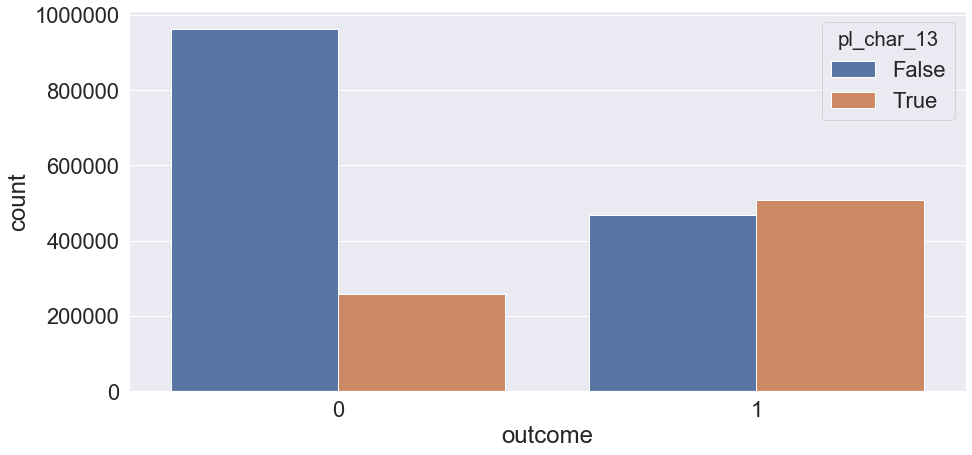

In [38]:
# pl.info()
# pl.char_38.unique()
# ac.columns
# ac.info()
plt.figure(figsize=(15,7))

ac_pl_merge.pl_char_11.value_counts()
# sns.countplot('pl_char_10', data=ac_pl_merge, hue='outcome') ,
# sns.countplot('pl_char_37', data=ac_pl_merge, hue='outcome')
sns.countplot('outcome', data=ac_pl_merge, hue='pl_char_13')

ac_pl_merge.pl_char_13.value_counts()

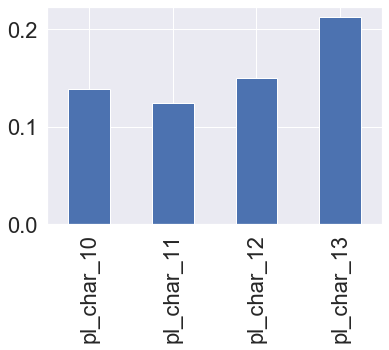

In [47]:
outcome_1 = ac_pl_merge[ac_pl_merge['outcome'] == 1]
outcome_0 = ac_pl_merge[ac_pl_merge['outcome'] == 0]

# ac_pl_merge[outcome_1][['pl_char_10']].mean()
ac_pl_merge.loc[ac_pl_merge['outcome'] == 0, :][['pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13',
       ]].mean().plot(kind='bar')


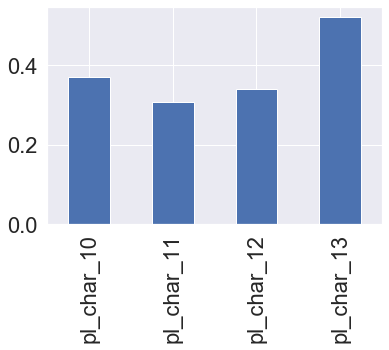

In [48]:
ac_pl_merge.loc[ac_pl_merge['outcome'] == 1, :][['pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13'
 ]].mean().plot(kind='bar')

In [49]:
# ac_pl_merge.loc[ac_pl_merge['outcome'] == 0, :][['pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13','pl_char_14', 'pl_char_15', 'pl_char_16', 'pl_char_17', 'pl_char_18',
#        'pl_char_19', 'pl_char_20', 'pl_char_21', 'pl_char_22', 'pl_char_23',
#        'pl_char_24', 'pl_char_25', 'pl_char_26', 'pl_char_27', 'pl_char_28',
#        'pl_char_29', 'pl_char_30', 'pl_char_31', 'pl_char_32', 'pl_char_33',
#        'pl_char_34', 'pl_char_35', 'pl_char_36', 'pl_char_37', 'pl_char_38'
#        ]].mean()

In [50]:
# ac_pl_merge.loc[ac_pl_merge['outcome'] == 1, :][['pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13','pl_char_14', 'pl_char_15', 'pl_char_16', 'pl_char_17', 'pl_char_18',
#        'pl_char_19', 'pl_char_20', 'pl_char_21', 'pl_char_22', 'pl_char_23',
#        'pl_char_24', 'pl_char_25', 'pl_char_26', 'pl_char_27', 'pl_char_28',
#        'pl_char_29', 'pl_char_30', 'pl_char_31', 'pl_char_32', 'pl_char_33',
#        'pl_char_34', 'pl_char_35', 'pl_char_36', 'pl_char_37', 'pl_char_38'
#        ]].mean()

In [51]:
# ac_pl_merge.columns

In [52]:
# ac_pl_merge.loc[ac_pl_merge['outcome'] == 1, :].shape
# ac_pl_merge.loc[ac_pl_merge['outcome'] == 0, :].shape

In [53]:
# ac_pl_merge[outcome_1][['pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13',
#        'pl_char_14', 'pl_char_15', 'pl_char_16', 'pl_char_17', 'pl_char_18',
#        'pl_char_19', 'pl_char_20', 'pl_char_21', 'pl_char_22', 'pl_char_23',
#        'pl_char_24', 'pl_char_25', 'pl_char_26', 'pl_char_27', 'pl_char_28',
#        'pl_char_29', 'pl_char_30', 'pl_char_31', 'pl_char_32', 'pl_char_33',
#        'pl_char_34', 'pl_char_35', 'pl_char_36', 'pl_char_37']].mean()

In [54]:
# ac_pl_merge.groupby('outcome')['act_char_1','act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
#        'act_char_9', 'act_char_10'].count()

In [127]:
# # ac_pl_merge.people_id.head(20)
# ac_pl_merge.loc[ac_pl_merge['people_id'] == 'ppl_64887',:]['outcome'].value_counts()

In [125]:
# ac_pl_merge.people_id.value_counts()

In [57]:
# ac_pl_merge.groupby(['outcome','activity_category'])['act_char_1','act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
#        'act_char_9', 'act_char_10'].count()

In [126]:
# ac_pl_merge_perc = ac_pl_merge.groupby(['activity_category','outcome'])['act_char_1','act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
#        'act_char_9', 'act_char_10'].count().reset_index()
# # ac_pl_merge_perc['act_total'] = ac_pl_merge_perc['act_char_9'] + ac_pl_merge_perc['act_char_10']
# ac_pl_merge_perc

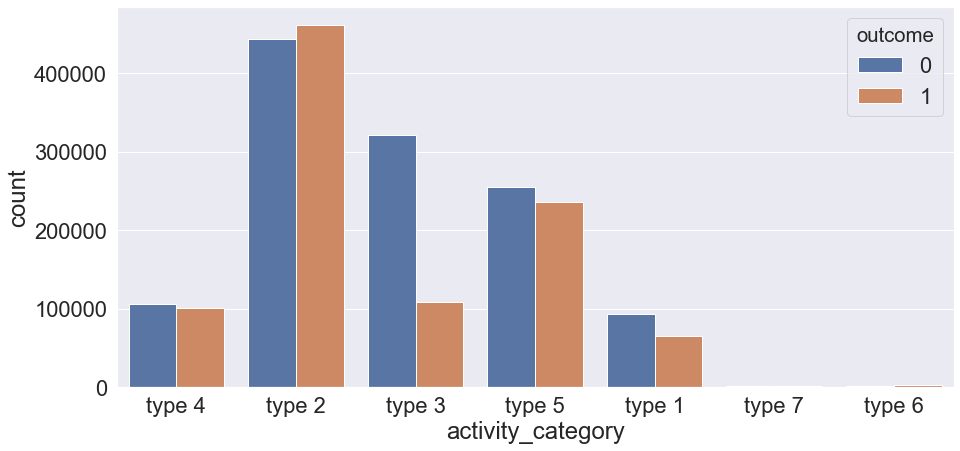

In [59]:
plt.figure(figsize=(15,7))

sns.countplot('activity_category', data=ac_pl_merge, hue='outcome')

In [128]:
# ac_pl_merge.act_char_10.count()
# ac_pl_merge.activity_id.head()
# ac_pl_merge.act_char_10.value_counts().plot(kind='bar')

In [64]:
# ac_pl_merge_perc = ac_pl_merge.groupby(['activity_category','outcome'])['act_char_9', 'act_char_10'].count().reset_index()
# ac_pl_merge_perc

In [67]:
type_outcome = ac_pl_merge.groupby(['activity_category','outcome'])['people_id'].count().reset_index()
type_outcome.columns=['activity_category','outcome','count']

In [68]:
# stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_37'], ac_pl_merge[ac_pl_merge_1]['pl_char_37'], equal_var=False)

In [69]:
# ax=ac_pl_merge.outcome.value_counts().plot(kind='bar', color='red')
# totals = []
# for i in ax.patches:
#     totals.append(i.get_height())
# total = sum(totals)

# for i in ax.patches:
#     ax.text(i.get_x()-.0, i.get_height()+5, \
#             str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
#                 color='blue')

In [70]:
# # ac.groupby(['activity_category','outcome'])['people_id'].count().reset_index().plot(kind='bar', stacked=True)
# # ac.groupby(['activity_category'])['outcome'].count().reset_index().plot(kind='bar')
# plt.figure(figsize=(10,5))
# sns.barplot('activity_category', 'count', data=type_outcome, ci=False, hue='outcome')

## Insight:

Type2 and type5 activities have higher probablity to give a positive outcome(business value) compared to remaining five activities. However, type3 activity has the highest probablity of giving a negative outcome(business value). 

In [71]:
ac_pl_merge['activity_category'].value_counts()
ac_pl_merge_type2 = ac_pl_merge[ac_pl_merge['activity_category'] == 'type 2']
ac_pl_merge_type2.outcome.value_counts()

1    461681
0    443002
Name: outcome, dtype: int64

In [72]:
# ac_pl_merge_type2.outcome.plot(kind='bar')

In [73]:
# plt.figure(figsize=(10,5))
# sns.countplot('activity_category', data=ac_pl_merge, hue='outcome')

In [74]:
# # sns.barplot('activity_category', 'people_id', data=type_outcome, ci=False,  hue='outcome',stacked=True)
# # type_outcome.plot(kind='bar', stacked=True)
# plt.figure(figsize=(10,5))
# sns.barplot('outcome', 'count', data=type_outcome, ci=False, hue='activity_category')

In [75]:
# ac_pl_merge.groupby(['activity_category','outcome'])['act_char_1',
#        'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
#        'act_char_9', 'act_char_10'].count()

In [77]:
# # ac[ac.people_id.value_counts().head(32).reset_index()['index']]
# repeated_customer=ac_pl_merge.people_id.value_counts().head(500).reset_index()
# # ac.loc[ac.people_id == ac[ac.people_id.value_counts().head(32).reset_index()['index']]]
# # mask1= ac[ac['people_id'] == ac.people_id.value_counts().head(32).reset_index().head(1)['index']]
# # ac.loc[ac.people_id == ac.people_id.value_counts().head(32).reset_index().head(1)['index'],:]
# repeated_customer.people_id.sum()
# # for i in mask:
# #     if i in ac['people_id']:
# #         print(ac[i])
# ac_pl_merge.loc[ac_pl_merge.people_id == "ppl_247868",]['outcome'].value_counts()

In [78]:
# plt.figure(figsize=(7,5))
# sns.boxplot('outcome', 'pl_char_38', data=ac_pl_merge, hue='outcome', orient='v')

In [79]:
# import statsmodels.api as sm 
# sm.qqplot(ac_pl_merge['pl_char_38']) 


In [80]:
# customer_count = ac_pl_merge.people_id.value_counts().reset_index()
# customer_count.columns=['cust_id', 'No_act']
# customer_count.shape[0]
# one_time_customer = customer_count[customer_count['No_act'] < 2].count()
# repeated_customer = customer_count[customer_count['No_act'] > 1].count()
# one_time_customer, repeated_customer

In [81]:
# pl_month_count = ac_pl_merge.pl_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
# pl_month_count.columns=['month', 'count']
# sns.barplot('month', 'count', data=pl_month_count)

In [82]:
# ac_month_count = ac_pl_merge.act_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
# ac_month_count.columns=['month', 'count']
# sns.barplot('month', 'count', data=ac_month_count)

In [83]:
df_outcome_1=ac_pl_merge[ac_pl_merge['outcome'] == 1]
df_outcome_1.shape
df_outcome_0=ac_pl_merge[ac_pl_merge['outcome'] == 0]
df_outcome_0.shape


(1221794, 55)

In [84]:
# df_outcome_1_month_count = df_outcome_1.act_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
# df_outcome_1_month_count.columns=['month', 'count']
# month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
#               7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
# plt.figure(figsize=(30,7))
# df_outcome_1_month_count.month = df_outcome_1_month_count.month.replace(month_map)
# sns.barplot('month', 'count', data=df_outcome_1_month_count)
# plt.title('Successfull Outcome by Month')

In [85]:
# df_outcome_0_month_count = df_outcome_0.act_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
# df_outcome_0_month_count.columns=['month', 'count']
# month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
#               7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
# plt.figure(figsize=(30,7))
# df_outcome_0_month_count.month = df_outcome_0_month_count.month.replace(month_map)
# sns.barplot('month', 'count', data=df_outcome_0_month_count)
# plt.title('Failed Outcome by Month')

In [86]:
# df_outcome_weekday_count = ac_pl_merge.act_date.dt.weekday.value_counts().sort_values().reset_index().sort_values('index') # Sunday is 0.
# df_outcome_weekday_count.columns=['weekday', 'count']
# # df_outcome_1_weekday_count.weekday.replace(0,'Monday')
# weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
# df_outcome_weekday_count.weekday = df_outcome_weekday_count.weekday.replace(weekday_map)
# plt.figure(figsize=(15,7))
# sns.barplot('weekday', 'count', data=df_outcome_weekday_count)
# plt.xticks(rotation = 45)
# plt.title('Outcome by Weekday')

In [87]:
# df_outcome_1_weekday_count = df_outcome_1.act_date.dt.weekday.value_counts().sort_values().reset_index().sort_values('index') # Sunday is 0.
# df_outcome_1_weekday_count.columns=['weekday', 'count']
# # df_outcome_1_weekday_count.weekday.replace(0,'Monday')
# weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
# df_outcome_1_weekday_count.weekday = df_outcome_1_weekday_count.weekday.replace(weekday_map)
# plt.figure(figsize=(15,7))
# sns.barplot('weekday', 'count', data=df_outcome_1_weekday_count)
# plt.xticks(rotation = 45)
# plt.title('Successfull Outcome by Weekday')
# # df_outcome_1_weekday_count

In [88]:
# df_outcome_0_weekday_count = df_outcome_0.act_date.dt.weekday.value_counts().sort_values().reset_index().sort_values('index') # Sunday is 0.
# df_outcome_0_weekday_count.columns=['weekday', 'count']
# # df_outcome_1_weekday_count.weekday.replace(0,'Monday')
# weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
# df_outcome_0_weekday_count.weekday = df_outcome_0_weekday_count.weekday.replace(weekday_map)
# plt.figure(figsize=(15,7))
# sns.barplot('weekday', 'count', data=df_outcome_0_weekday_count)
# plt.xticks(rotation = 45)
# plt.title('Failed Outcome by Weekday')

In [89]:
# # ac.groupby(['activity_category','outcome']).count()
# ac_pl_merge.pl_date.dt.year.value_counts().sort_values()
# # pl.date.dt.year.value_counts().sort_values().plot(kind='bar')
# ac_pl_merge.outcome.value_counts()

In [92]:
ac_pl_merge_1_2022 = ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year
# ac_pl_merge_1_2023 = ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year == 2023
# # ac_pl_merge.loc[ac_pl_merge_1_2022, :]
ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year.reset_index()['act_date'].value_counts()

2023    513176
2022    462321
Name: act_date, dtype: int64

In [94]:
# # ac_pl_merge.pl_date
# plt.figure(figsize=(10,5))
# sns.countplot(ac_pl_merge['pl_date'].dt.year, data=ac_pl_merge)
# # sns.barplot('index', 'date',data=ac_date_year)
# plt.xlabel('Year')
# plt.ylabel('Number')
# plt.title('Customer Regestration by Year')

In [95]:
# plt.figure(figsize=(10,5))
# sns.countplot(ac_pl_merge['pl_date'].dt.year, data=ac_pl_merge, hue='outcome')
# # sns.barplot('index', 'date',data=ac_date_year)
# plt.xlabel('Year')
# plt.ylabel('Number')
# plt.title('People Regestration by Year')

In [97]:
# sns.countplot('act_char_8', data=ac_pl_merge, hue='outcome')

In [98]:
# ac_pl_merge.act_char_6.value_counts()

In [100]:
ac_pl_merge_0 = ac_pl_merge['outcome'] == 0
ac_pl_merge_1 = ac_pl_merge['outcome'] == 1
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_13'], ac_pl_merge[ac_pl_merge_1]['pl_char_13'], equal_var=False)
# ac_pl_merge[ac_pl_merge_1].columns

Ttest_indResult(statistic=-493.1944437127587, pvalue=0.0)

In [101]:
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_38'], ac_pl_merge[ac_pl_merge_1]['pl_char_38'], equal_var=False)

Ttest_indResult(statistic=-1446.7458801234332, pvalue=0.0)

In [102]:
# stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_37'], ac_pl_merge[ac_pl_merge_1]['pl_char_37'], equal_var=False)

In [103]:
# stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['activity_category'], ac_pl_merge[ac_pl_merge_1]['activity_category'], equal_var=False)

In [104]:
# stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['activity_category'], ac_pl_merge[ac_pl_merge_1]['activity_category'], equal_var=False)

In [ ]:
# sns.barplot(ac['date'].dt.year, 'people_id', data=ac, hue='outcome')

In [ ]:
# ac.groupby(['outcome','activity_category'])['char_1',
#        'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
# #        'char_9', 'char_10'].count().plot(kind='bar', stacked=True)

In [1]:
# for i in ac:
#     print('No. of Null', i,ac[i].isnull().sum())

In [ ]:
# # # ac.head(20)
# # pl.char_38.unique()
# # pl.char_38.min() , pl.char_38.max(), pl.char_38.mean(), pl.char_38.median()

# ac_pl_merge.columns
# ac_pl_merge.groupby(['outcome' ])[ 'pl_char_10','pl_char_11', 'pl_char_12', 'pl_char_13',
#        'pl_char_14', 'pl_char_15', 'pl_char_16', 'pl_char_17', 'pl_char_18',
#        'pl_char_19', 'pl_char_20', 'pl_char_21', 'pl_char_22', 'pl_char_23',
#        'pl_char_24', 'pl_char_25', 'pl_char_26', 'pl_char_27', 'pl_char_28',
#        'pl_char_29', 'pl_char_30', 'pl_char_31', 'pl_char_32', 'pl_char_33',
#        'pl_char_34', 'pl_char_35', 'pl_char_36', 'pl_char_37', 'pl_char_38'].count()

# # ac.loc[ac.people_id == 'ppl_100']
# # pl.group_1.nunique()
# ac_pl_merge.pl_char_19.value_counts()
# ac_pl_merge.groupby(['pl_char_11'])[ 'outcome'].count()

In [ ]:
# ac.activity_category.unique()
# ac.outcome.unique()
# ac.act_date.max(), ac.act_date.min(), pl.pl_date.max(), pl.pl_date.min()
# # ac.columns
# ac.act_date.head()

In [ ]:

# for i in ac.columns:
#     i.isnull().sum()
# ac.isnull().sum() , ac.shape
# ac.shape[0] - ac.outcome.notnull().sum()
# ac.shape[0] - ac.char_1.isnull().sum()
# for i in ac.columns:
#     ac.columns[i],ac.shape[0] - ac[i].isnull().sum()
# ac.outcome.value_counts().plot(kind='bar')
# for i in ac_pl_merge:
#     print('Unique Elements: ', i,":",ac_pl_merge[i].nunique())
# # ac.char_1.unique()
# for i in pl:
#     print('Unique Elements: ', i,":",pl[i].nunique())
# for i in ac_pl_merge:
#     print('No. of Null', i,":",ac_pl_merge[i].isnull().sum())
# for i in pl:
#     print('No. of Null', i,pl[i].isnull().sum())    #All good, no missing values
# ac_pl_merge.columns